In [ ]:
from LDPC_decoding import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

[0.3366364551254693, -0.3078201655184834, 1.4287094693833176, 1.986505941950653, -0.5381166043115821, -0.6401966776219307]


In [1]:
def initBitToCheck(L, bitToCheck):
	for i in range(len(bitToCheck)):
		bitToCheck[i] = L[:]

In [2]:
def sequentialSumProductDecodingSimulation(y, H, maxIterations = 100):

    edges = hammToB(H)
    M = [[0 for i in range(len(H[0]))] for j in range(len(H))]
    initBitToCheck(y, M)
    E = [[0 for i in range(len(H[0]))] for j in range(len(H))]


    for _ in range(maxIterations):
                    
        checkNode = int(len(H)*random.uniform(0, 1))
        sumProductDecoding(E, M, checkNode, edges)
            
        L = y.copy()
        for i in range(len(E)):
            for j in range(len(E[i])):
                L[j] += E[i][j]
            
        Lbinary = []
        for noise in L:
            if noise >= 0:
                Lbinary.append(0)
            else:
                Lbinary.append(1)
                    
        
        s = []
        for i in range(len(H)):
            total = np.dot(H[i], Lbinary)
            s.append(total % 2)
            
        sumOfBits = sum(s)
        if(sumOfBits == 0):
            return Lbinary
        else:
            M = [[0 for i in range(len(H[0]))] for j in range(len(H))]
            for i in range(len(E)):
                for j in range(len(E[0])):
                    val = 0
                    if E[i][j] != 0:
                        for row in range(len(E)):
                            if row != i:
                                val += E[row][j]
                        M[i][j] = val + L[j]
                            
                        if M[i][j] < -20:
                            M[i][j] = -20
                        elif M[i][j] > 20:
                            M[i][j] = 20
    
    return Lbinary

In [3]:
def softDecisionSimulation(H, r, EbN0dB, maxBlockErros = 100, maxIterations = 200, seed = 0):

	EbN0 = pow(10, EbN0dB / 10)
	EsN0 = EbN0 * r

	lengthOfCode = len(H[0])
	x = [0]*lengthOfCode
	bitErrors = 0
	blockErrors = 0
	I = 0

	np.random.seed(seed)

	while blockErrors < maxBlockErros and I < maxIterations:

		# pass through AWGN

		y = list(awgn([1]*lengthOfCode, EsN0))

		# decode for errors
		decodedY = sequentialSumProductDecodingSimulation(y, H)

		# count number of errors the decoder missed
		errors = errorCounter(x, decodedY)

		blockErrors += errors[1]
		bitErrors += errors[0]
		I += 1

	return [bitErrors/I, blockErrors/I]

In [4]:
B = [[10,30,40],[5,32,45],[16,18,39],[12,22,38],[15,19,47],[2,17,34],[9,24,42],[1,29,33],[4,27,36],[3,26,35],[11,31,43],[7,21,44],[8,20,48],[14,23,46],[6,28,37],[13,25,41],[14,32,43],[5,23,37],[2,31,36],[1,28,34],[7,25,47],[10,21,33],[15,30,35],[16,26,48],[3,22,46],[12,20,41],[8,18,38],[4,19,45],[6,24,40],[9,27,39],[13,17,42],[11,29,44],[8,24,34],[6,25,36],[9,19,43],[1,20,46],[14,27,42],[7,22,39],[13,18,35],[4,26,40],[16,29,38],[15,21,48],[11,23,45],[3,17,47],[5,28,44],[12,32,33],[2,30,41],[10,31,37],[10,18,36],[4,23,44],[9,29,40],[2,27,38],[8,30,42],[12,28,43],[11,20,37],[1,19,35],[15,31,39],[16,32,41],[5,26,33],[3,25,45],[13,21,34],[14,24,48],[7,17,46],[6,22,47],[7,27,40],[11,18,33],[2,32,35],[10,28,47],[5,24,41],[12,25,37],[3,19,39],[14,31,44],[16,30,34],[13,20,38],[9,22,36],[6,17,45],[4,21,42],[15,29,46],[8,26,43],[1,23,48],[1,25,42],[15,22,40],[8,21,41],[9,18,47],[6,27,43],[11,30,46],[7,31,35],[5,20,36],[14,17,38],[16,28,45],[4,32,37],[13,23,33],[12,26,44],[3,29,48],[2,24,39],[10,19,34],[8,20,36,56,80,81],[6,19,47,52,67,95],[10,25,44,60,71,94],[9,28,40,50,77,91],[2,18,45,59,69,88],[15,29,34,64,76,85],[12,21,38,63,65,87],[13,27,33,53,79,83],[7,30,35,51,75,84],[1,22,48,49,68,96],[11,32,43,55,66,86],[4,26,46,54,70,93],[16,31,39,61,74,92],[14,17,37,62,72,89],[5,23,42,57,78,82],[3,24,41,58,73,90],[6,31,44,63,76,89],[3,27,39,49,66,84],[5,28,35,56,71,96],[13,26,36,55,74,88],[12,22,42,61,77,83],[4,25,38,64,75,82],[14,18,43,50,80,92],[7,29,33,62,69,95],[16,21,34,60,70,81],[10,24,40,59,79,93],[9,30,37,52,65,85],[15,20,45,54,68,90],[8,32,41,51,78,94],[1,23,47,53,73,86],[11,19,48,57,72,87],[2,17,46,58,67,91],[8,22,46,59,66,92],[6,20,33,61,73,96],[10,23,39,56,67,87],[9,19,34,49,75,88],[15,18,48,55,70,91],[4,27,41,52,74,89],[3,30,38,57,71,95],[1,29,40,51,65,82],[16,26,47,58,69,83],[7,31,37,53,77,81],[11,17,35,54,79,85],[12,32,45,50,72,93],[2,28,43,60,76,90],[14,25,36,63,78,86],[5,21,44,64,68,84],[13,24,42,62,80,94]]
B = [[1,2,4], [2,3,5], [1,5,6], [3,4,6]]
propVSerror = {}
H = BToHamm(B)

# Generate data
EbN0dB = -6
while EbN0dB <= 0:
    error = softDecisionSimulation(H, 0.5, EbN0dB)[1]
    propVSerror[EbN0dB] = error
    EbN0dB += 0.005

NameError: name 'BToHamm' is not defined

In [ ]:
EbN0dB = list(propVSerror.keys())
BlockError = ([float(propVSerror[k]) for k in EbN0dB])

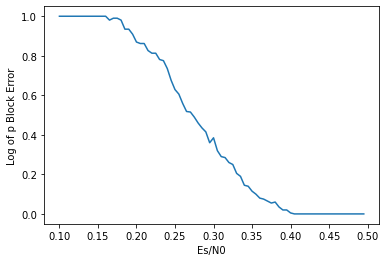

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('Es/N0')
ax.set_ylabel('Log of p Block Error')
ax.plot(EbN0dB, BlockError)

###### BSCError2 = list(propVSerror.keys())
BlockError2 = np.log([float(propVSerror[k]) for k in BSCError2])

In [ ]:
EbN0dB2 = list(propVSerror.keys())
BlockError2 = ([float(propVSerror[k]) for k in EbN0dB2])

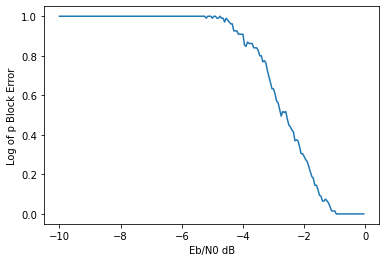

In [ ]:
fig = plt.figure()
ax = plt.axes()
ax.set_xlabel('Eb/N0 dB')
ax.set_ylabel('Log of p Block Error')
ax.plot(EbN0dB2, BlockError2)